# Factors that Affect F1-Scores

### 2. External Factors

This notebook analyzes the factors such as time allocation, hardware propoerties, pipeline configurations etc. The effects of these factors to the F1-score is analyzed using ANOVA analysis. The details of this approach are shared in the original manuscript.

In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
import os
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
DIRECTORY = os.getcwd()

In [2]:
df = pd.read_excel(os.path.join(DIRECTORY, "scores_copy.xlsx"), header=0)
df

,Unnamed: 0,pipeline,Caller,BaseCalib,Mapper,group,precision,recall,f1,accuracy,...,Time_spent_on_downloading_data,Time_debugging_mapping,Time_for_mapping,Time_for_variant_calling,Time_for_filtering,Time_for_analysis,Time_for_visualization,Time_for_report,Time_for_presentation,Most_difficult_part
0,1,mutect_yb_bwa,mutect,yb,bwa,g1,0.862167,0.781223,0.819702,0.694487,...,8-16 hours,> 16 hours,> 16 hours,4-8 hours,2- 4 hours,4-8 hours,8-16 hours,8-16 hours,< 2 hours,Mapping
1,17,mutect_yb_bowtie,mutect,yb,bowtie,g1,0.877551,0.481481,0.621802,0.451170,...,8-16 hours,> 16 hours,> 16 hours,4-8 hours,2- 4 hours,4-8 hours,8-16 hours,8-16 hours,< 2 hours,Mapping
2,25,mutect_nb_bwa,mutect,nb,bwa,g1,0.777538,0.620155,0.689986,0.526701,...,8-16 hours,> 16 hours,> 16 hours,4-8 hours,2- 4 hours,4-8 hours,8-16 hours,8-16 hours,< 2 hours,Mapping
3,33,mutect_nb_bowtie,mutect,nb,bowtie,g1,0.832955,0.631352,0.718275,0.560398,...,8-16 hours,> 16 hours,> 16 hours,4-8 hours,2- 4 hours,4-8 hours,8-16 hours,8-16 hours,< 2 hours,Mapping
4,47,strelka_yb_bwa,strelka,yb,bwa,g1,0.485729,0.806202,0.606218,0.434944,...,8-16 hours,> 16 hours,> 16 hours,4-8 hours,2- 4 hours,4-8 hours,8-16 hours,8-16 hours,< 2 hours,Mapping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,82,strelka_nb_bowtie,strelka,nb,bowtie,g9,0.632902,0.715762,0.671787,0.505782,...,4-8 hours,> 16 hours,> 16 hours,2- 4 hours,2- 4 hours,2- 4 hours,4-8 hours,8-16 hours,2- 4 hours,Mapping
128,88,ss_nb_bowtie,ss,nb,bowtie,g9,0.334165,0.692506,0.450799,0.290988,...,4-8 hours,> 16 hours,> 16 hours,2- 4 hours,2- 4 hours,2- 4 hours,4-8 hours,8-16 hours,2- 4 hours,Mapping
129,105,ss_nb_bwa,ss,nb,bwa,g9,0.301142,0.749354,0.429630,0.273585,...,4-8 hours,> 16 hours,> 16 hours,2- 4 hours,2- 4 hours,2- 4 hours,4-8 hours,8-16 hours,2- 4 hours,Mapping
130,115,ss_yb_bowtie,ss,yb,bowtie,g9,0.445776,0.672696,0.536217,0.366323,...,4-8 hours,> 16 hours,> 16 hours,2- 4 hours,2- 4 hours,2- 4 hours,4-8 hours,8-16 hours,2- 4 hours,Mapping


### Interpretation of the values:

- p-value (PR(>F)):
Factors with p-values less than a significance level (commonly 0.05) are considered to have a statistically significant effect on the response variable.

- F-statistic:
Compare the F-statistics of different factors. A higher F-statistic suggests a greater impact on the response variable.

- Sum-of-squares:
Higher sum of squares for a factor indicates more variability explained by that factor.

In [3]:
# All factors
model = ols('f1 ~ C(Caller) + C(BaseCalib) + C(Mapper) + C(Method) + C(OS) + C(RAM) + C(Hard_disk) + C(Helpful_error_logs) + C(Enough_curriculum) + C(Time_understanding_definition) + C(Enough_class_content) + C(Time_installing_cosap) + C(Time_debugging_download) + C(Time_spent_on_downloading_data) + C(Time_debugging_mapping) + C(Time_for_mapping) + C(Time_for_variant_calling) + C(Time_for_filtering) + C(Time_for_analysis) + C(Time_for_visualization) + C(Time_for_report) + C(Time_for_presentation) + C(Most_difficult_part)', data=df).fit()

anova_table_all = sm.stats.anova_lm(model, typ=2)
print(anova_table_all)

                                     sum_sq    df           F        PR(>F)
C(Caller)                          0.152598   2.0    5.387686  6.288098e-03
C(BaseCalib)                       0.022696   1.0    1.602648  2.090282e-01
C(Mapper)                          0.011118   1.0    0.785069  3.781248e-01
C(Method)                          1.839053   1.0  129.860393  9.951322e-19
C(OS)                              0.059523   1.0    4.203088  4.346886e-02
C(RAM)                             0.704401  12.0    4.144965  4.413634e-05
C(Hard_disk)                       0.970728  24.0    2.856068  2.148120e-04
C(Helpful_error_logs)              0.891987   1.0   62.985581  8.132392e-12
C(Enough_curriculum)               0.205526   1.0   14.512717  2.641922e-04
C(Time_understanding_definition)   1.295702   3.0   30.497642  1.958314e-13
C(Enough_class_content)            0.327657   1.0   23.136755  6.559836e-06
C(Time_installing_cosap)           1.709370   3.0   40.234374  3.229978e-16
C(Time_debug

In [4]:
# Extract relevant metrics
f_stats = anova_table_all['F']
p_values = anova_table_all['PR(>F)']
sum_sq = anova_table_all['sum_sq']

# Normalize the metrics (optional)
f_stats_norm = (f_stats - f_stats.min()) / (f_stats.max() - f_stats.min())
p_values_norm = (p_values.max() - p_values) / (p_values.max() - p_values.min())
sum_sq_norm = (sum_sq - sum_sq.min()) / (sum_sq.max() - sum_sq.min())

# Combine the metrics into a single score
combined_score = f_stats_norm + p_values_norm + sum_sq_norm

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Factor': anova_table_all.index,
    'F-Statistic': f_stats,
    'P-Value': p_values,
    'Sum of Squares': sum_sq,
    'Combined Score': combined_score
})

# Sort the factors by the combined score
results_all = results.sort_values(by='Combined Score', ascending=False)
print(results_all)

                                                              Factor  \
C(Method)                                                  C(Method)   
C(Time_for_variant_calling)              C(Time_for_variant_calling)   
C(Time_installing_cosap)                    C(Time_installing_cosap)   
C(Time_debugging_mapping)                  C(Time_debugging_mapping)   
C(Time_for_filtering)                          C(Time_for_filtering)   
C(Time_for_mapping)                              C(Time_for_mapping)   
C(Helpful_error_logs)                          C(Helpful_error_logs)   
C(Time_for_analysis)                            C(Time_for_analysis)   
C(Time_understanding_definition)    C(Time_understanding_definition)   
C(Time_for_presentation)                    C(Time_for_presentation)   
C(Time_for_visualization)                  C(Time_for_visualization)   
C(Hard_disk)                                            C(Hard_disk)   
C(RAM)                                                        C(

Only important factors:

In [5]:
# Important factors
model = ols('f1 ~ C(Caller) + C(BaseCalib) + C(Mapper) + C(Method) + C(OS) + C(RAM)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df          F    PR(>F)
C(Caller)     0.132257    2.0   2.502545  0.086405
C(BaseCalib)  0.042971    1.0   1.626165  0.204850
C(Mapper)     0.020055    1.0   0.758957  0.385502
C(Method)     0.128627    1.0   4.867724  0.029386
C(OS)         0.341794    1.0  12.934745  0.000480
C(RAM)        0.274244   12.0   0.864867  0.584332
Residual      2.985971  113.0        NaN       NaN


In [6]:
# Extract relevant metrics
f_stats = anova_table['F']
p_values = anova_table['PR(>F)']
sum_sq = anova_table['sum_sq']

# Normalize the metrics (optional)
f_stats_norm = (f_stats - f_stats.min()) / (f_stats.max() - f_stats.min())
p_values_norm = (p_values.max() - p_values) / (p_values.max() - p_values.min())
sum_sq_norm = (sum_sq - sum_sq.min()) / (sum_sq.max() - sum_sq.min())

# Combine the metrics into a single score
combined_score = f_stats_norm + p_values_norm + sum_sq_norm

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Factor': anova_table.index,
    'F-Statistic': f_stats,
    'P-Value': p_values,
    'Sum of Squares': sum_sq,
    'Combined Score': combined_score
})

# Sort the factors by the combined score
results_important = results.sort_values(by='Combined Score', ascending=False)
print(results_important)
results_important = results_important.drop('Residual')

                    Factor  F-Statistic   P-Value  Sum of Squares  \
C(OS)                C(OS)    12.934745  0.000480        0.341794   
C(Method)        C(Method)     4.867724  0.029386        0.128627   
C(Caller)        C(Caller)     2.502545  0.086405        0.132257   
C(BaseCalib)  C(BaseCalib)     1.626165  0.204850        0.042971   
C(Mapper)        C(Mapper)     0.758957  0.385502        0.020055   
C(RAM)              C(RAM)     0.864867  0.584332        0.274244   
Residual          Residual          NaN       NaN        2.985971   

              Combined Score  
C(OS)               2.108479  
C(Method)           1.324550  
C(Caller)           1.033862  
C(BaseCalib)        0.728913  
C(Mapper)           0.340548  
C(RAM)              0.094402  
Residual                 NaN  


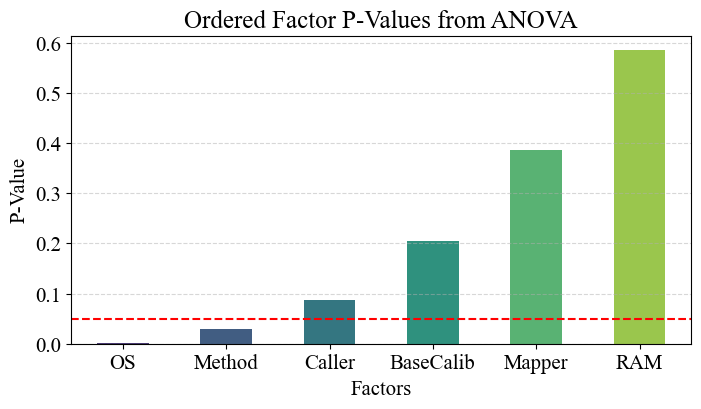

In [7]:
plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 15, 'font.family': 'Times New Roman'})


x_axis = results_important["Factor"].values

## delete C() in the names
for i in range(len(x_axis)):
    x_axis[i] = x_axis[i][2:-1]

sns.barplot(x=x_axis, y=results_important["P-Value"].values, palette='viridis', width=0.5)
#sns.barplot(x=x_axis, y=results_important["P-Value"].values, palette='viridis')



plt.title('Ordered Factor P-Values from ANOVA')
plt.xlabel('Factors', fontsize=15)
plt.ylabel('P-Value', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.axhline(y=0.05, color='red', linestyle='--')  # Add a line for significance level
plt.savefig(os.path.join(DIRECTORY, 'Figures', 'factor_p_values.pdf'), bbox_inches='tight')
plt.show()


-----